In [1]:
import QAData
from json2html import *
from os import listdir
from os.path import isfile, join
import PassageRetrieval as pr
import matplotlib
matplotlib.use('Agg')
import pylab as plt
import nlp_utils
import time
from json_utils import JSONConnector
#%matplotlib inline

Using gpu device 0: GeForce GTX TITAN X (CNMeM is disabled, cuDNN 5103)


In [6]:
exp_in_path = "/home/aerossom/passage-retrieval/conf_experiments/KerasLstmModel_1_exp1.json"
exp_out_path = "/var/www/html/aerossom/exp_result/"

In [3]:
w2v_path = "/home/aerossom/datasets/word2vect/GoogleNews-vectors-negative300.bin"
w2v_util = nlp_utils.Word2vectUtils(w2v_path)

In [4]:
onlyfiles = [f for f in listdir(exp_in_path) if isfile(join(exp_in_path, f))]
print 'Exprimentation files', onlyfiles

Exprimentation files ['params.json']


In [5]:
import PassageRetrieval
reload(PassageRetrieval)

<module 'PassageRetrieval' from 'PassageRetrieval.pyc'>

In [10]:
print 'Starting experimentation with model file ', exp_in_path
run_id = str(int(time.time()))
js = JSONConnector(exp_in_path)
with open(exp_in_path) as f: 
    report = pr.run_experiment(js, w2v_util, run_id, exp_in_path, json2html.convert(json = f.read()))
#with open(exp_out_path+js.data['model']+'_'+run_id, 'wb') as report_file:
#    report_file.write(report)

Starting experimentation with model file  /home/aerossom/passage-retrieval/conf_experiments/KerasLstmModel_1_exp1.json


INFO:root:Questions loaded.
INFO:root:Working on train...
INFO:root:Questions for train:2117
INFO:root:Questions for validate:295
INFO:root:Questions for test:632
INFO:root:Loading the dataset!
INFO:root:Loading the model, KerasLstmModel_1
INFO:root:Trainning the model


____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_4 (InputLayer)             (None, 50, 300)       0                                            
____________________________________________________________________________________________________
input_5 (InputLayer)             (None, 50, 300)       0                                            
____________________________________________________________________________________________________
lstm_2 (LSTM)                    (None, 64)            93440       input_4[0][0]                    
                                                                   input_5[0][0]                    
____________________________________________________________________________________________________
merge_3 (Merge)                  (None, 128)           0           lstm_2[0][0]            

KeyboardInterrupt: 

In [20]:
js.data['model']

u'KerasLstmModel'

In [14]:
js.data

{u'dataset': u'WikiQADataSet',
 u'dataset_partitions': [u'train', u'validate', u'test'],
 u'expriment_id': u'keras_lstm_$runid',
 u'ground_truth_file': u'/home/aerossom/datasets/WikiQACorpus/WikiQA-test-filtered.ref',
 u'method_params': {u'a_input_size': 300,
  u'batch_size': 500,
  u'epochs': 500,
  u'final_dense_units': 32,
  u'final_dropout': 0.2,
  u'final_merge_units': 64,
  u'merged_vector_units': 64,
  u'patience': 500,
  u'q_input_size': 300,
  u'shared_lstm_units': 128,
  u'third_input_size': 600,
  u'time_steps': 100,
  u'validation_size': 100},
 u'model': u'KerasLstmModel',
 u'out_folder': u'/home/aerossom/passage-retrieval/experiments/',
 u'out_rank_file': u'keras_lstm_w2v_wnet_features_$runid.rank',
 u'preprocess_steps': [],
 u'trec_eval_path': u'/home/aerossom/trec_eval.9.0/trec_eval',
 u'word2vect_path': u'/home/aerossom/datasets/word2vect/GoogleNews-vectors-negative300.bin',
 u'working_folder': u'/home/aerossom/passage-retrieval/experiments/working_files/'}

In [25]:
import pandas as pd
js = JSONConnector(exp_in_path+'params_exp_1-3.json')
df = pd.DataFrame(data=js.data['method_params'])
print df.to_html()

ValueError: If using all scalar values, you must pass an index

In [26]:
js.data['method_params']

{u'a_input_size': 300,
 u'batch_size': 500,
 u'epochs': 500,
 u'final_dense_units': 32,
 u'final_dropout': 0.2,
 u'final_merge_units': 64,
 u'merged_vector_units': 64,
 u'patience': 500,
 u'q_input_size': 300,
 u'shared_lstm_units': 128,
 u'third_input_size': 600,
 u'time_steps': 100,
 u'validation_size': 100}

In [2]:
import numpy as np
np.multiply([1,2,3],[10,100,1000])

array([  10,  200, 3000])

In [36]:
timesteps = 10
q_vect = np.array([[1,2,3]])
pad = ((0,timesteps-q_vect.shape[0]),(0,0))
q_vect = np.pad(q_vect, pad, mode='constant', constant_values=0)

In [37]:
print q_vect

[[1 2 3]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]]


In [15]:
print q_vect.shape

(10, 3)


In [8]:
import nlp_utils as nl
import numpy as np

In [5]:
w2v = nl.Word2vectUtils('/home/aerossom/datasets/word2vect/GoogleNews-vectors-negative300.bin')

In [47]:
str_1 = 'the'
q_vect = w2v.transform2Word2Vect(nl.data_preprocess(str_1,['stop_words_removal']))
print q_vect

[]


In [48]:
if len(q_vect)==0:
    q_vect = q_vect + [np.zeros(300)]
q_vect = np.array(q_vect)

In [50]:
timesteps = 10
pad = ((0,timesteps-q_vect.shape[0]),(0,0))
q_vect = np.pad(q_vect, pad, mode='constant', constant_values=0)

In [51]:
q_vect.shape

(10, 300)

In [4]:
class A(object):
    def __init__(self, name):
        self.name = name
        self.a = 'a'

class B(A):
    def __init__(self, name):
        A.__init__(self, name)
        
    def get(self):
        print self.name, self.a

class C(B):
    def __init__(self, name):
        B.__init__(self, name)
        self.a = 'c'
        

In [5]:
c = C('test')

In [6]:
c.get()

test c


In [265]:
import QAData
import trecqajakanahelper
from QAData import *
reload(QAData)
reload(trecqajakanahelper)
ds = DataSetFactory.loadDataSet('TrecDataSet') #WikiQADataSet TrecDataSet TrecDataSet_TrainAll

num_skipped 0
num_skipped 0
num_skipped 0


In [266]:
trecqajakanahelper.datasets

{'test': '/home/aerossom/datasets/jacana-qa-naacl2013-data-results/test-less-than-40.manual-edit.xml',
 'train': '/home/aerossom/datasets/jacana-qa-naacl2013-data-results/train-less-than-40.manual-edit.xml',
 'train-all': '/home/aerossom/datasets/jacana-qa-naacl2013-data-results/train2393.cleanup.xml',
 'validate': '/home/aerossom/datasets/jacana-qa-naacl2013-data-results/dev-less-than-40.manual-edit.xml'}

In [267]:
print ds.get_stats()
qp = ds.build_qa_pairs(ds.questions['train'])

Train: 4718, Test: 1517, Validate: 1148


In [268]:
print len(qp), sum([ 1 for p in qp if p.l==1])

4718 348


In [269]:
qp = ds.build_qa_pairs(ds.questions['test'])
len(ds.get_random_samples(qp, 100, 0.5))

100

In [270]:
print [ p.qi for p in qp ]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 3, 3, 3, 3, 3, 3, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,

In [232]:
import trecqajakanahelper as trec
questions = {}
questions['train'] = ( trec.load_data(trec.datasets['dev']) )

KeyError: 'dev'

In [25]:
trec.datasets

{'test': '/home/aerossom/datasets/jacana-qa-naacl2013-data-results/test-less-than-40.manual-edit.xml',
 'train': '/home/aerossom/datasets/jacana-qa-naacl2013-data-results/train-less-than-40.manual-edit.xml',
 'train-all': '/home/aerossom/datasets/jacana-qa-naacl2013-data-results/train2393.cleanup.xml',
 'validate': '/home/aerossom/datasets/jacana-qa-naacl2013-data-results/dev-less-than-40.manual-edit.xml'}

In [26]:
import nltk as nltk
import numpy as np
def getSalienceScore(qv, av, maxterms=40):
    score = 0
    #print qv, av
    imp_postag = set(['WRB','VB', 'VBD', 'VBG', 'VBN', 'VBP','VBZ', 'WDT', 'WP', 'WRB', 'NN', 'NNS', 'NNP', 'NNPS', 'MD'])
    pw1 = nltk.pos_tag(qv)
    pw2 = nltk.pos_tag(av)
    if len(pw1)>maxterms:
        pw1 = pw1[0:maxterms]
    if len(pw2)>maxterms:
        pw2 = pw2[0:maxterms]
    w1_m = np.zeros((maxterms,maxterms))
    w2_m = np.zeros((maxterms,maxterms))
    if len(qv) != 0 and len(av) != 0:
        pw1_l = [len(set([w1[1]]).intersection(imp_postag)) for w1 in pw1]
        w1_m[:,0:len(pw1_l)]=pw1_l
        pw2_l = [len(set([w2[1]]).intersection(imp_postag)) for w2 in pw2]
        w2_m[:,0:len(pw2_l)]=pw2_l
        out_m = ((w1_m + w2_m.T)/3)+0.3
    else:
        out_m = (w1_m + w2_m.T)
    #print pw1_l, pw2_l, pw1
    return out_m[0:maxterms,0:maxterms]

In [27]:
print getSalienceScore(['the','car','is', 'red'],['car'],5)

[[ 0.63333333  0.96666667  0.96666667  0.96666667  0.63333333]
 [ 0.3         0.63333333  0.63333333  0.63333333  0.3       ]
 [ 0.3         0.63333333  0.63333333  0.63333333  0.3       ]
 [ 0.3         0.63333333  0.63333333  0.63333333  0.3       ]
 [ 0.3         0.63333333  0.63333333  0.63333333  0.3       ]]


In [29]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
in_file = '/home/aerossom/passage-retrieval/experiments/working_files/keras_convnet_1491219535_history.pkl'
with open(in_file, 'rb') as input:
    history = pickle.load(input)

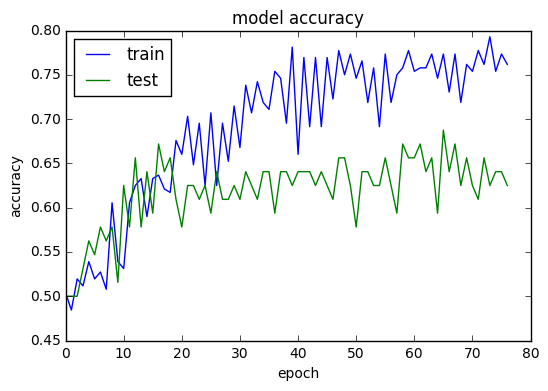

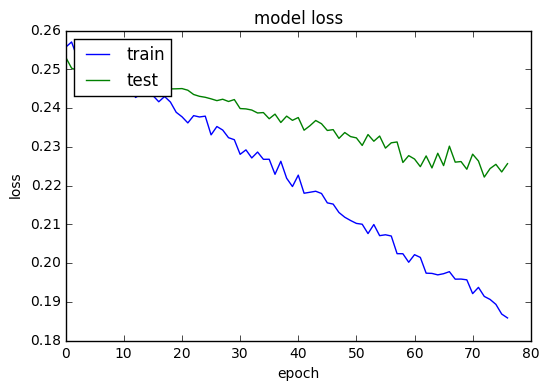

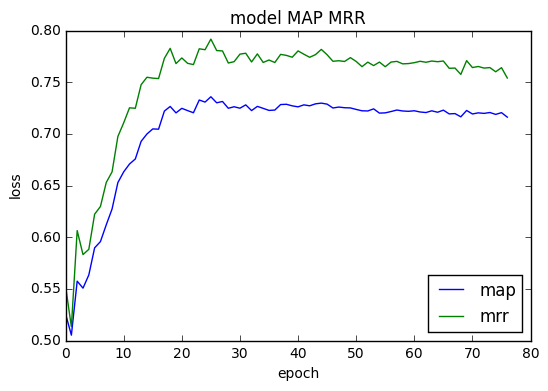

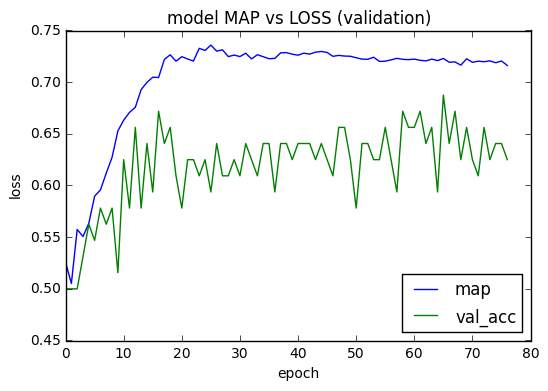

In [37]:
# Print learning history
# summarize history for accuracy
plt.plot(history['acc'])
plt.plot(history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history['map'])
plt.plot(history['mrr'])
plt.title('model MAP MRR')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['map', 'mrr'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(history['map'])
plt.plot(history['val_acc'])
plt.title('model MAP vs LOSS (validation)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['map', 'val_acc'], loc='lower right')
plt.show()